# Segmentación de imágenes

Normalmente, para extraer características basadas en descriptores de forma, es necesario, previamente, llevar a cabo alguna técnica de segmentación que permita delimitar la región de interés que se desea analizar.

Los algoritmos de segmentación se basan en particionar la imagen digital en diferentes segmentos (objetos) para simplificar la representación de la imagen y facilitar la comprensión de su contenido.

Las técnicas de segmentación permiten asignar una etiqueta a cada píxel de la imagen de manera que los píxeles con la misma etiqueta comparten características similares.

Existen dos tipos de segmentación:

- **Segmentación semántica**. Consiste en un problema de clasificación a nivel de píxel que permite asignar una etiqueta de objeto a cada píxel para delimitar regiones de interés. Por ejemplo, diferenciar un grupo de personas del fondo de la imagen.

- **Segmentación de instancia**. Consiste en una tarea más compleja que implica llevar a cabo una detección de objetos para asignar una etiqueta de instancia a cada objeto. Es decir, la segmentación de instancia permite identificar objetos que comparten las mismas propiedades como objetos independiente. Por ejemplo, diferenciar cada persona de un grupo de personas en una imagen.

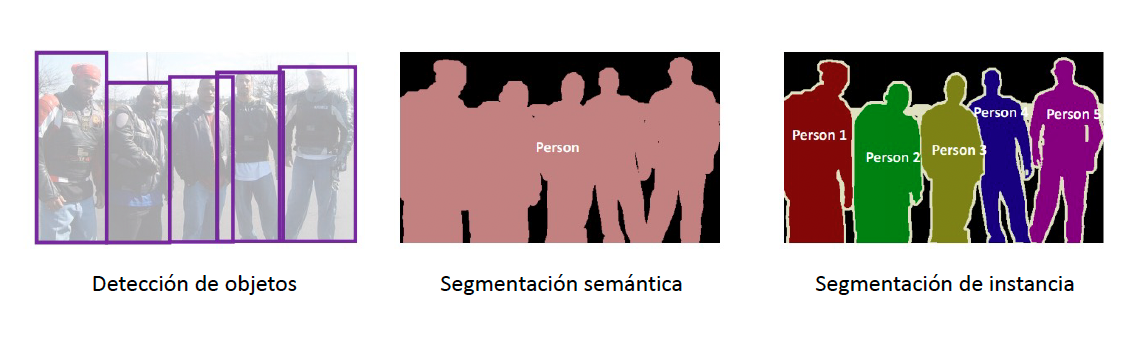


## Aplicaciones

- Sistemas de ayuda al diagnóstico mediante análisis de imágenes médicas. Por
ejemplo: resonancia magnética, TAC, imagen histológica, imágenes de fondo de
ojo, radiografías, ultrasonido, etc.

- Reconocimiento de objetos. Por ejemplo, detección de peatones, localización de
objetos en imágenes por satélite (carreteras, bosques, cultivos, etc.)

- Reconocimiento de patrones en temas de seguridad. Por ejemplo,
reconocimiento de caras (face recognition), reconocimiento de huellas dactilares
(fingerprint recognition) o reconocimiento del iris.

- Sistemas de control de tráfico y conducción autónoma. Por ejemplo, detección
de señales de tráfico, reconocimiento de matrículas, self driving

### Técnicas

- Métodos de umbralización (thresholding)
- Métodos de agrupación (clustering)
- Detección de bordes
- Crecimiento de regiones (región growing)
- Watershed
- Autoencoders (Redes Neuronales Convolucionales)

### SEGMENTACIÓN MEDIANTE THRESHOLDING

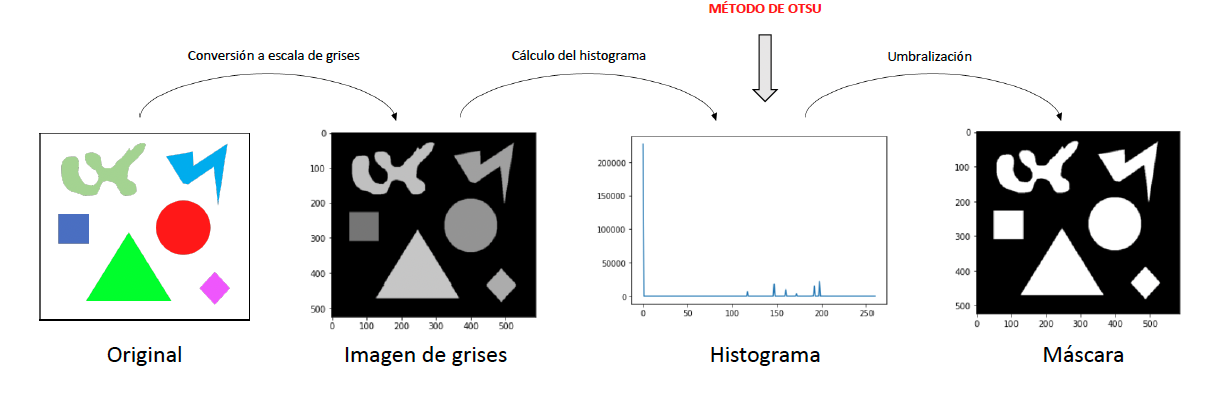

In [ ]:
#!pip install opencv-python

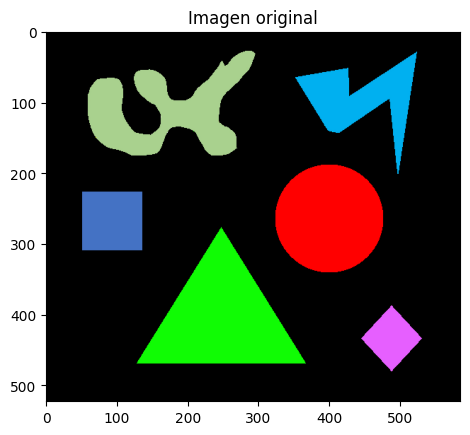

In [3]:
import matplotlib.pyplot as plt
import cv2

# Read an image
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap='gray')
#plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.show()

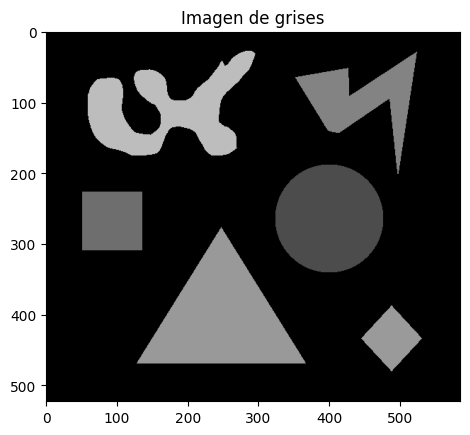

In [4]:
# Convertimos la imagen a escala de grises
import numpy as np
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Lo pasamos a Gris
#gray_img = cv2.imread('figuras.png', 0) # Una forma de leer la imagen directamente en escala de grises

plt.imshow(gray_img, cmap='gray')
plt.title('Imagen de grises')
plt.show()

### Histograma

cv2.calcHist(images, channels, mask, histSize, ranges)

- images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage]
    
    
- channels : A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2]

- mask: Remember learning about masks in my Image Masking with OpenCV guide? Well, here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None
    
    
- histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32] 

- ranges: The range of possible pixel values. Normally, this is [0, 256] (that is not a typo — the ending range of the cv2.calcHist function is non-inclusive so you’ll want to provide a value of 256 rather than 255) for each channel, but if you are using a color space other than RGB [such as HSV], the ranges might be different.)

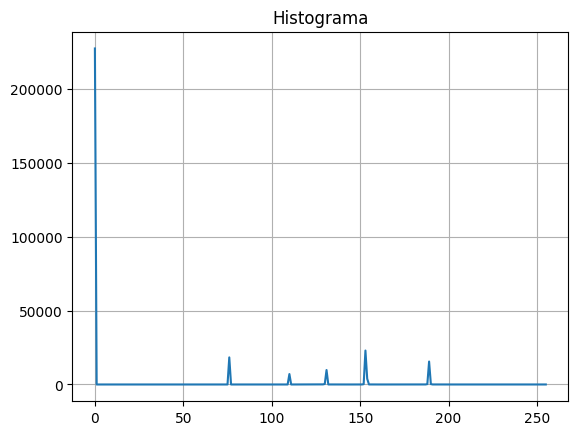

In [5]:
# Calculamos el histograma

hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256]) # [0] son los canales, None la máscara


plt.plot(hist)
plt.grid()
plt.title('Histograma')
plt.show()

# Otra forma de mostrar el histograma (solo visualización)
# plt.hist(gray_img.ravel(), bins=50)
# plt.grid(True)
# plt.show()

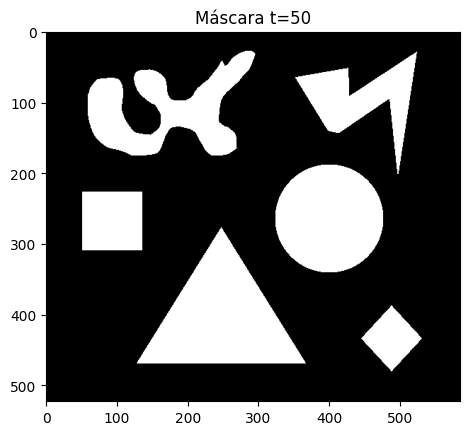

[  0 255]


In [16]:
# Fijamos el umbral en base al histograma anterior
t = 50

# Extreaemos la máscara binaria
maxim = 255 #Aquí puedo definir el valor máximo que puede tener la máscara, en este caso binario, 0 y 1
_, mask = cv2.threshold(gray_img, t, maxim, cv2.THRESH_BINARY)

# Otra formas de extraer la máscara 
# mask = gray_img.copy()
# mask = mask>t

# Visualizamos para corroborar
plt.imshow(mask, cmap='gray')
plt.title('Máscara t=' + str(t))
plt.show()

print(np.unique(mask)) # Atent@s a los formatos (bool, uint8, etc.)

### Método Otsu

El método de Otsu es un procedimiento no paramétrico que permite obtener el umbral óptimo maximizando la varianza entre clases. Búsqueda exhaustiva.
Se parte de una imagen con N píxeles que puede tomar L valores de grises diferentes

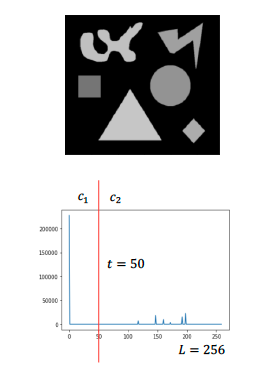

[0 1]


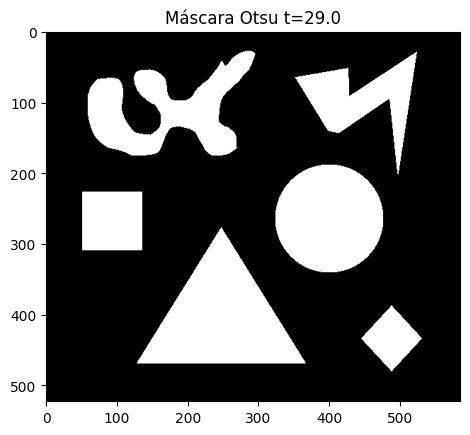

In [15]:
# Fijamos el umbral con el método de OTSU
t, mask = cv2.threshold(gray_img,0,1,cv2.THRESH_OTSU) # 0 es por defecto y 1 es el valor máximo de la máscara
#t, mask = cv2.threshold(gray_img,0,1,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(np.unique(mask))

# Visualizamos para corroborar que se obtiene el mismo resultado
plt.imshow(mask, cmap='gray')
plt.title('Máscara Otsu t=' + str(t))
plt.show()

### SEGMENTACIÓN MEDIANTE CONVERSIONES DE COLOR

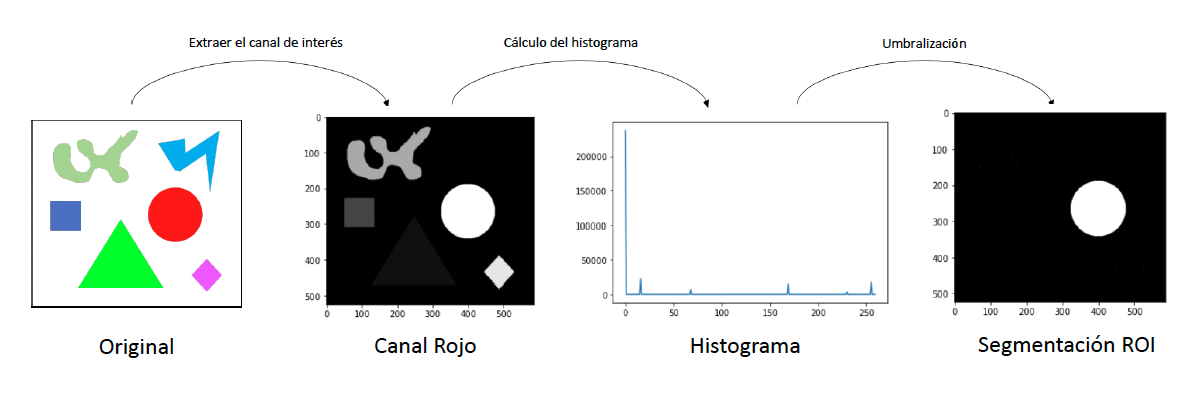

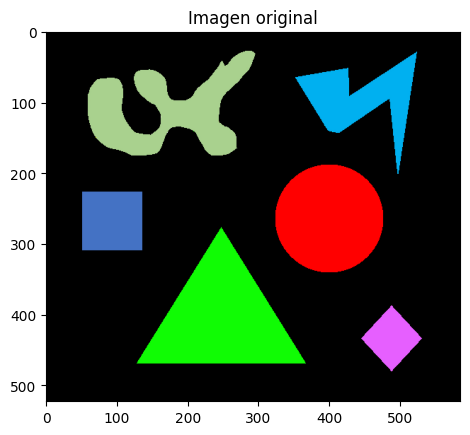

In [17]:
# Imaginamos que queremos segmentar únicamente el círculo
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

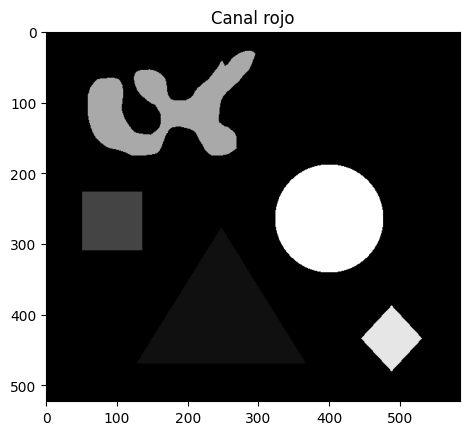

In [18]:
# Obtenemos el canal rojo
R = img[:,:,2]

plt.imshow(R, cmap='gray')
plt.title('Canal rojo')
plt.show()

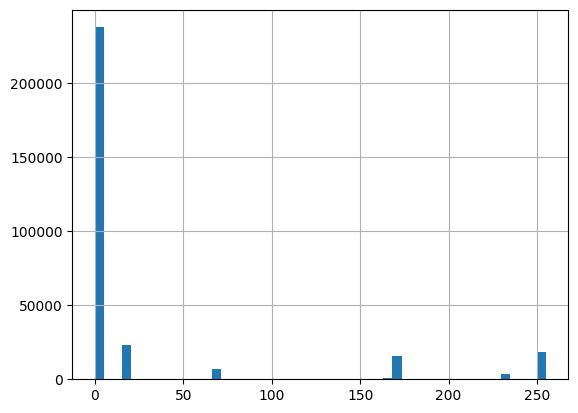

255


In [19]:
# Observamos el histograma
plt.hist(R.ravel(), bins=50)
plt.grid(True)
plt.show()
print(np.max(R))

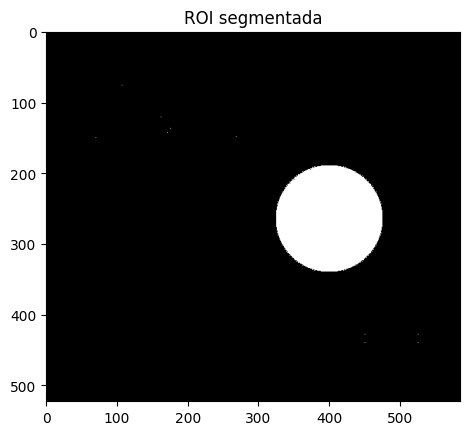

In [20]:
# Fijamos el umbral y extraemos la máscara
t=np.max(R) #Umbral
mask = R.copy()
mask[mask<t] = 0 #Lo que esta por debajo de la máscara lo pongo a 0

plt.imshow(mask, cmap='gray')
plt.title('ROI segmentada')
plt.show()

In [21]:
# Ejercicio individual
# Obtener una máscara con la imagen del rayo azul mediante segmentación por espacio de color
# Función para extraer los colores secundarios
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
def convert_to_CMYK(rgb_p):
    with np.errstate(invalid='ignore', divide='ignore'):
        K = 1 - np.max(rgb_p, axis=2)
        C = (1-rgb_p[:,:,0] - K)/(1-K)
        M = (1-rgb_p[:,:,1] - K)/(1-K)
        Y = (1-rgb_p[:,:,2] - K)/(1-K)
    CMYK = (np.dstack((C,M,Y,K)))
    return CMYK

In [22]:
# Leer la imagen 
img = cv2.imread('images/figuras.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_p = rgb.astype('uint8')/255

# Extraer los colores secundarios
CMYK = convert_to_CMYK(rgb_p)

# Extraer los canales por separado
C,M,Y,K = cv2.split(CMYK)
C = C.astype('uint8')

# Calcular la máscara de la figura del rayo
t, mask = cv2.threshold(C,0,1,cv2.THRESH_OTSU)

t=np.max(C) #Umbral
mask = C.copy()
mask[mask<t] = 0

# Visualizar la máscara
plt.imshow(C, cmap='gray')
plt.title('ROI segmentada')
plt.show()

NameError: name 'convert_to_CMYK' is not defined

### SEGMENTACIÓN SEMÁNTICA CON DETECCIÓN DE BORDES

Cuando hablamos de bordes de una imagen, hablamos de los píxeles donde hay un cambio de intensidad.

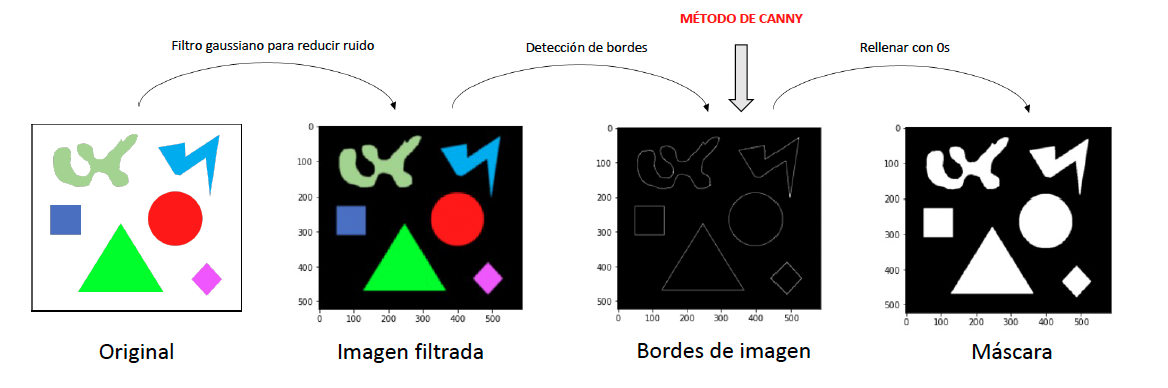


#### Detección de bordes - Método Canny

1. Detector de bordes con Sobel
El operador Sobel se basa en el cálculo de la primera derivada para obtener el gradiente de la intensidad de una imagen en cada píxel. Es decir, mide cambios de intensidad en la imagen. Para ello, aplica dos máscaras de convoluciones con kernels de 3x3 elementos, uno para los cambios horizontales y otro para los verticales.
De esta manera, se obtienen 𝑮𝒙 y 𝑮𝒚 que representan las aproximaciones de las derivadas de intensidades.
En cada píxel de la imagen, se combinan las aproximaciones de las derivadas para obtener la magnitud 𝑮 y la dirección 𝚯 del gradiente. La dirección de los píxeles puede ser en estos ángulos (0, 45, 90, o 135)

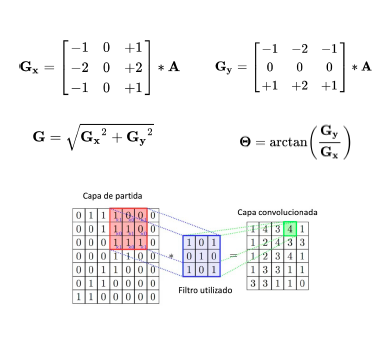

2. Filtrado de bordes mediante la supresión non-máximum
Esta técnica permite adelgazar los bordes basándose en el gradiente. El objetivo es eliminar los píxeles que no corresponden a un borde. Se compara el valor de intensidad de cada píxel con el valor de intensidad de los píxeles vecinos en la dirección del gradiente. Si es mayor, ese píxel se considera borde.

3. Umbralización por histéresis
El umbral por histéresis se centra en establecer dos umbrales (uno máximo y otro mínimo).
- Si el valor del píxel es mayor que el umbral máximo, el píxel se considera parte del borde.
- Si el valor del píxel es menor que el umbral mínimo, el píxel no se considera parte del borde.
- Si el valor del píxel está entre el mínimo y el máximo umbral, será borde si está conectado a un píxel que sí es parte del borde.


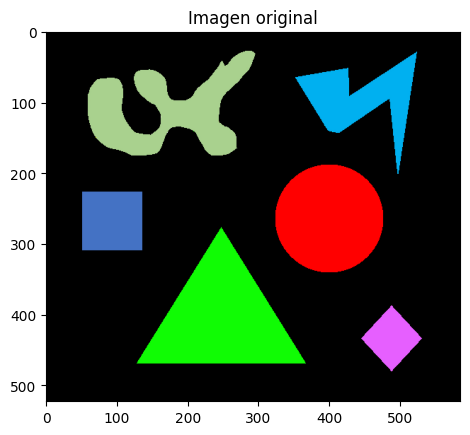

In [41]:
# SEGMENTACIÓN SEMÁNTICA CON DETECCIÓN DE BORDES
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Imagen original')
plt.show()

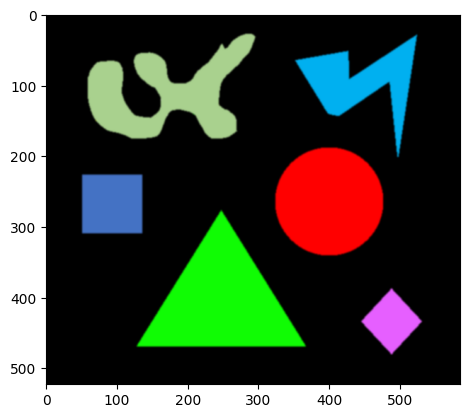

In [42]:
# Aplicamos un filtro gaussiano para emborronar las altas frecuencias
img_gaus = cv2.GaussianBlur(img_rgb, (5,5), 0) # (5x5) es el tamaño del filtro y 0 es la desviación estándar
plt.imshow(img_gaus, cmap='gray')
plt.show()

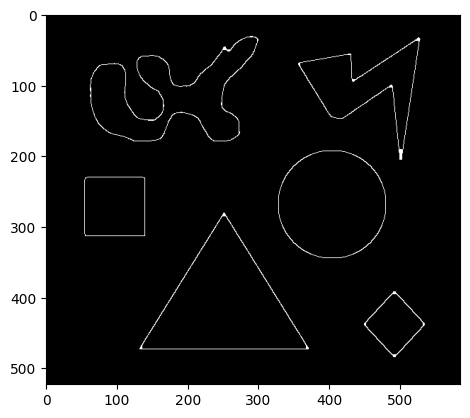

In [46]:
# Detección de bordes de Canny
canny = cv2.Canny(img_gaus, 255/3, 255) # minValue and maxValue. Canny recomienda que minValue sea 3 veces mayor que maxValue

#kernel = np.ones((2,2), 'uint8')
#canny = cv2.dilate(canny, kernel, iterations=2) ## Me permite hacer más gruesos los bordes
#canny = cv2.erode(canny, kernel, iterations=2) ## Me permite hacer afinar los bordes

plt.imshow(canny, cmap='gray')
plt.show()

/var/folders/j3/cj2m33117h1g9l38ly6r6vgw0000gn/T/ipykernel_73722/2220132281.py:2: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_fill_holes as bfh


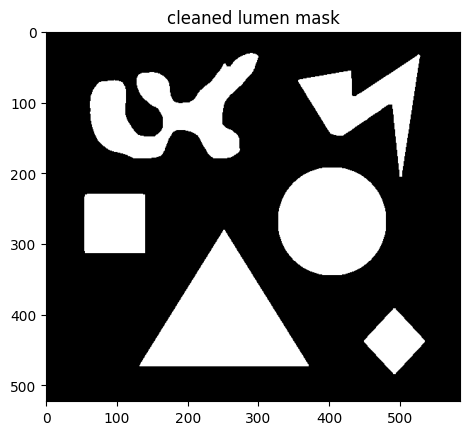

In [47]:
# Rellenar objetos (solo rellena si no están en contacto con el límite de la imagen)
from scipy.ndimage.morphology import binary_fill_holes as bfh
bordes = canny.copy()
filled_bordes = bfh(bordes)

plt.imshow(filled_bordes.astype('uint8'), cmap='gray')
plt.title('cleaned lumen mask')
plt.show()

### SEGMENTACIÓN POR CRECIMIENTO DE REGIONES (region growing)

In [ ]:
#!pip install scikit-image

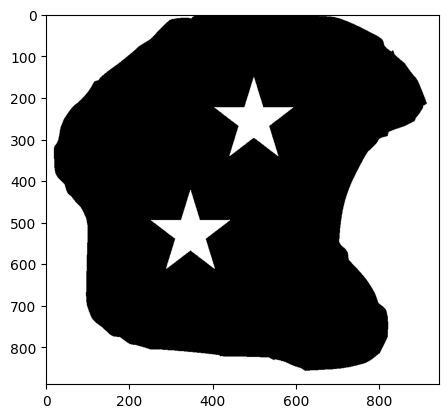

In [48]:
# Cargar imagen
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/estrellas.png', 0)

plt.imshow(img, cmap='gray')
plt.show()

In [51]:
# Crear una copia de la imagen
mask = img.copy()

# Definir una imagen negra de referencia
h, w = img.shape
ref = np.zeros((h+2, w+2), np.uint8)

# Fijar la semilla. En este caso en la esquina superior izquierda (posición 0,0) para rellenar a partir de ahí
cv2.floodFill(mask, ref, (0,0), 0); # Como nos interesa rellenar de negro, utilizamos el 0 en la última posición

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mask, cmap='gray'), ax[1].set_title('máscara')
plt.show()

error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/floodfill.cpp:505: error: (-2:Unspecified error) in function 'int cv::floodFill(cv::InputOutputArray, cv::InputOutputArray, cv::Point, cv::Scalar, cv::Rect *, cv::Scalar, cv::Scalar, int)'
>  (expected: 'mask.rows == size.height + 2'), where
>     'mask.rows' is 890
> must be equal to
>     'size.height + 2' is 891
